In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [377]:
cc09 = pd.read_csv('City Council/2009_November Municipal (General) City Council At Large Results.csv')
cc19 = pd.read_csv('City Council/2019_November Municipal (General) City Council At Large Results.csv')
m09 = pd.read_csv('Mayoral Election/2009_November Municipal (General) Mayoral Results.csv')
m17 = pd.read_csv('Mayoral Election/2017_November Municipal (General) Mayoral Results.csv')
inc09 = pd.read_csv('Income_Metrics_By_Precinct_2006-2011.csv')
inc19 = pd.read_csv('Income_Metrics_By_Precinct_2015-2019.csv')

df = pd.DataFrame(columns=['Ward/Precinct', 'CC Ballots 2009', 'CC Ballots 2019',
                           'M Ballots 2009', 'M Ballots 2017', 'Registered Voters 2009', 'Registered Voters 2017', 
                           'Registered Voters 2019', 
                           'CC Voter Turnout 2009', 'CC Voter Turnout 2019', 'M Voter Turnout 2009', 
                           'M Voter Turnout 2017', 'CC % Net Change','M % Net Change', 'CC Net Change', 
                           'M Net Change', 'Median Income 2009', 'Median Income 2017/19', '% Change in Median Income',
                           'Neighborhood'])
df['Ward/Precinct'] = cc09['Ward/Precinct']
df['CC Ballots 2009'] = cc09['BALLOTS CAST']
df['CC Ballots 2019'] = cc19['BALLOTS CAST']
df['M Ballots 2009'] = m09['BALLOTS CAST']
df['M Ballots 2017'] = m17['BALLOTS CAST']

for i in range(len(df)):
    df.loc[i, 'CC Voter Turnout 2009'] = round(cc09.loc[i, 'BALLOTS CAST']/cc09.loc[i, 'Registered Voters'],2)
    df.loc[i, 'CC Voter Turnout 2019'] = round(cc19.loc[i, 'BALLOTS CAST']/cc19.loc[i, 'Registered Voters'],2)
    df.loc[i, 'M Voter Turnout 2009'] = round(m09.loc[i, 'BALLOTS CAST']/m09.loc[i, 'Registered Voters'],2)
    df.loc[i, 'M Voter Turnout 2017'] = round(m17.loc[i, 'BALLOTS CAST']/m17.loc[i, 'Registered Voters'],2)
    df.loc[i, 'Registered Voters 2009'] = cc09.loc[i, 'Registered Voters']
    df.loc[i, 'Registered Voters 2017'] = m17.loc[i, 'Registered Voters']
    df.loc[i, 'Registered Voters 2019'] = cc19.loc[i, 'Registered Voters']
    df.loc[i, 'CC % Net Change'] = df.loc[i, 'CC Voter Turnout 2019'] - df.loc[i, 'CC Voter Turnout 2009']
    df.loc[i, 'M % Net Change'] = df.loc[i, 'M Voter Turnout 2017'] - df.loc[i, 'M Voter Turnout 2009']
    df.loc[i, 'CC Net Change'] = df.loc[i, 'CC Ballots 2019'] - df.loc[i, 'CC Ballots 2009']
    df.loc[i, 'M Net Change'] = df.loc[i, 'M Ballots 2017'] - df.loc[i, 'M Ballots 2009']
    df.loc[i, 'Ward/Precinct'] = str(df.loc[i, 'Ward/Precinct'])
    
    if len(df.loc[i, 'Ward/Precinct']) == 3:
        df.loc[i, 'Ward/Precinct'] = '0' + df.loc[i, 'Ward/Precinct']
        
    wp = df.loc[i, 'Ward/Precinct']
    filt = inc09['WARD_PRECI'] == wp
    temp = inc09[filt].reset_index(drop=False)
    df.loc[i, 'Median Income 2009'] = temp.loc[0, 'Median Household Income']
    filt1 = inc19['WARD_PRECI'] == wp
    temp1 = inc19[filt1].reset_index(drop=False)
    df.loc[i, 'Median Income 2017/19'] = temp1.loc[0, 'Median Household Income']
    df.loc[i, '% Change in Median Income'] = round((df.loc[i, 'Median Income 2017/19'] - df.loc[i, 'Median Income 2009'])/df.loc[i, 'Median Income 2009'], 2)

<ipython-input-377-c6a7cd445d79>:45: RuntimeWarning: invalid value encountered in long_scalars
  df.loc[i, '% Change in Median Income'] = round((df.loc[i, 'Median Income 2017/19'] - df.loc[i, 'Median Income 2009'])/df.loc[i, 'Median Income 2009'], 2)


In [378]:
neighbs = pd.read_csv('WardPrecinct_Matched_To_Neighborhood.csv').drop('Unnamed: 0', axis=1)
props = pd.read_csv('Neighborhood_Make_Up_Of_Precincts.csv').drop('Unnamed: 0', axis=1)
neighbs['%'] = np.zeros(len(neighbs))

for i in range(len(neighbs)):
    wp = neighbs.loc[i, 'WARD_PRECI']
    filt = neighbs['WARD_PRECI'] == wp
    inds = neighbs.index[filt].tolist()
    for n in inds:
        neighb = neighbs.loc[n, 'NEIGHBORHOOD']
        temp = props[['WARD_PRECI', neighb]]
        filt2 = temp['WARD_PRECI'] == wp
        neighbs.loc[n, '%'] = round(temp[filt2].reset_index(drop=False).loc[0, neighb],4)

In [379]:
for i in range(len(df)):
    wp = df.loc[i, 'Ward/Precinct']
    filt = neighbs['WARD_PRECI'] == wp
    temp = neighbs[filt].sort_values(by=['%']).reset_index(drop=False)
    df.loc[i, 'Neighborhood'] = temp.loc[0, 'NEIGHBORHOOD']
df

,Ward/Precinct,CC Ballots 2009,CC Ballots 2019,M Ballots 2009,M Ballots 2017,Registered Voters 2009,Registered Voters 2017,Registered Voters 2019,CC Voter Turnout 2009,CC Voter Turnout 2019,M Voter Turnout 2009,M Voter Turnout 2017,CC % Net Change,M % Net Change,CC Net Change,M Net Change,Median Income 2009,Median Income 2017/19,% Change in Median Income,Neighborhood
0,0101,397,280,397,495.0,1113,1397.0,1485,0.36,0.19,0.36,0.35,-0.17,-0.01,-117,98.0,59115,93699,0.59,East Boston
1,0102,273,147,273,298.0,816,1035.0,1108,0.33,0.13,0.33,0.29,-0.2,-0.04,-126,25.0,53958,81150,0.5,East Boston
2,0103,600,374,600,711.0,1720,2379.0,2665,0.35,0.14,0.35,0.3,-0.21,-0.05,-226,111.0,47616,72098,0.51,East Boston
3,0104,183,125,183,230.0,563,798.0,1122,0.33,0.11,0.33,0.29,-0.22,-0.04,-58,47.0,51557,70361,0.36,East Boston
4,0105,286,133,286,355.0,960,1255.0,1376,0.3,0.1,0.3,0.28,-0.2,-0.02,-153,69.0,56501,76775,0.36,East Boston
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,2209,304,278,304,284.0,1392,1328.0,1362,0.22,0.2,0.22,0.21,-0.02,-0.01,-26,-20.0,47578,78010,0.64,Brighton
250,2210,470,344,470,391.0,1664,1455.0,1583,0.28,0.22,0.28,0.27,-0.06,-0.01,-126,-79.0,62998,92347,0.47,Brighton
251,2211,316,249,316,265.0,1079,1041.0,1068,0.29,0.23,0.29,0.25,-0.06,-0.04,-67,-51.0,65317,97798,0.5,Brighton
252,2212,372,282,372,284.0,1100,1200.0,1257,0.34,0.22,0.34,0.24,-0.12,-0.1,-90,-88.0,56667,87962,0.55,Brighton


In [335]:
neighbs

,WARD_PRECI,NEIGHBORHOOD,%
0,1814,Roslindale,0.0005
1,1814,Hyde Park,0.9995
2,1822,Roslindale,0.2581
3,1822,Hyde Park,0.7419
4,1811,Roslindale,0.3590
...,...,...,...
399,0605,South Boston,0.9521
400,2105,Allston,0.9968
401,2103,Allston,0.9815
402,2104,Allston,1.0000


Text(0, 0.5, '% Net Change')

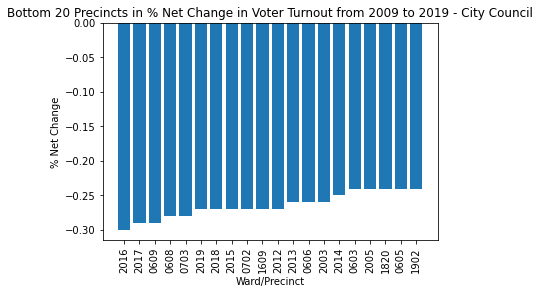

In [384]:
temp = df.sort_values(by=['CC % Net Change']).head(20).reset_index(drop=False)
plt.bar(temp['Ward/Precinct'],temp['CC % Net Change'])
plt.xticks(rotation=90)
plt.title('Bottom 20 Precincts in % Net Change in Voter Turnout from 2009 to 2019 - City Council')
plt.xlabel('Ward/Precinct')
plt.ylabel('% Net Change')

In [386]:
total09_cc = df['CC Ballots 2009'].sum()
total19_cc = df['CC Ballots 2019'].sum()
total09_m = df['M Ballots 2009'].sum()
total17_m = df['M Ballots 2017'].sum()
prec = temp['Ward/Precinct'].tolist()
close_look = pd.DataFrame(columns=['Ward/Precint', '% Of Total Ballots Cast 2009', 'Avg. Ballots Cast Per Precinct 2009', 
                             'Precinct Ballots Cast 2009', '% Of Total Ballots Cast 2019', 'Avg. Ballots Cast Per Precinct 2019', 
                             'Precinct Ballots Cast 2019', '% Change in Income'])
for i in range(len(prec)):
    filt = df['Ward/Precinct'] == prec[i]
    temp_df = df[filt].reset_index(drop=False)
    close_look.loc[i] = [prec[i], round(temp_df.loc[0, 'CC Ballots 2009']/total09_cc,3), round(total09_cc/254, 3), 
                   temp_df.loc[0, 'CC Ballots 2009'], round(temp_df.loc[0, 'CC Ballots 2019']/total19_cc,3),
                   round(total19_cc/254,3),temp_df.loc[0, 'CC Ballots 2019'],temp_df.loc[0, '% Change in Median Income']]
close_look

,Ward/Precint,% Of Total Ballots Cast 2009,Avg. Ballots Cast Per Precinct 2009,Precinct Ballots Cast 2009,% Of Total Ballots Cast 2019,Avg. Ballots Cast Per Precinct 2019,Precinct Ballots Cast 2019,% Change in Income
0,2016,0.008,437.756,878,0.006,263.713,396,-0.06
1,2017,0.008,437.756,929,0.007,263.713,437,0.25
2,0609,0.006,437.756,668,0.005,263.713,302,0.58
3,0608,0.006,437.756,650,0.004,263.713,293,0.54
4,0703,0.008,437.756,881,0.006,263.713,391,0.66
5,2019,0.005,437.756,534,0.004,263.713,269,0.23
6,2018,0.004,437.756,485,0.004,263.713,238,0.31
7,2015,0.007,437.756,777,0.005,263.713,325,0.08
8,0702,0.006,437.756,695,0.005,263.713,314,0.59
9,1609,0.007,437.756,781,0.007,263.713,466,0.43


In [393]:
close_look.to_csv('Bottom20_Precincts_%_Change_Voter_Turnout_2009-19_CC.csv')

Text(0, 0.5, '% Net Change')

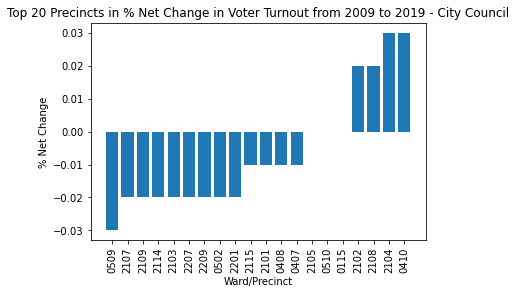

In [387]:
temp2 = df.sort_values(by=['CC % Net Change']).tail(20).reset_index(drop=False)
plt.bar(temp2['Ward/Precinct'],temp2['CC % Net Change'])
plt.xticks(rotation=90)
plt.title('Top 20 Precincts in % Net Change in Voter Turnout from 2009 to 2019 - City Council')
plt.xlabel('Ward/Precinct')
plt.ylabel('% Net Change')

In [388]:
total09_cc = df['CC Ballots 2009'].sum()
total19_cc = df['CC Ballots 2019'].sum()
total09_m = df['M Ballots 2009'].sum()
total17_m = df['M Ballots 2017'].sum()
prec = ['2102', '2104', '2108', '0410']
close_look = pd.DataFrame(columns=['Ward/Precint', '% Of Total Ballots Cast 2009', 'Avg. Ballots Cast Per Precinct 2009', 
                             'Precinct Ballots Cast 2009', '% Of Total Ballots Cast 2019', 'Avg. Ballots Cast Per Precinct 2019', 
                             'Precinct Ballots Cast 2019', '% Change in Income'])
for i in range(len(prec)):
    filt = df['Ward/Precinct'] == prec[i]
    temp_df = df[filt].reset_index(drop=False)
    close_look.loc[i] = [prec[i], round(temp_df.loc[0, 'CC Ballots 2009']/total09_cc,3), round(total09_cc/254, 3), 
                   temp_df.loc[0, 'CC Ballots 2009'], round(temp_df.loc[0, 'CC Ballots 2019']/total19_cc,3),
                   round(total19_cc/254,3),temp_df.loc[0, 'CC Ballots 2019'],temp_df.loc[0, '% Change in Median Income']]
close_look

,Ward/Precint,% Of Total Ballots Cast 2009,Avg. Ballots Cast Per Precinct 2009,Precinct Ballots Cast 2009,% Of Total Ballots Cast 2019,Avg. Ballots Cast Per Precinct 2019,Precinct Ballots Cast 2019,% Change in Income
0,2102,0.000,437.756,26,0.000,263.713,27,0.81
1,2104,0.001,437.756,94,0.002,263.713,121,0.62
2,2108,0.001,437.756,155,0.003,263.713,192,0.49
3,0410,0.000,437.756,42,0.001,263.713,38,0.42


In [394]:
close_look.to_csv('Top4_Precincts_%_Change_Voter_Turnout_2009-19_CC.csv')

Text(0, 0.5, '% Net Change')

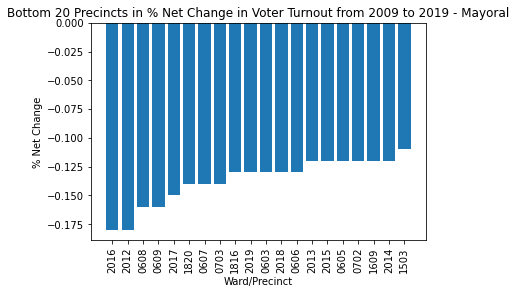

In [389]:
temp1 = df.sort_values(by=['M % Net Change']).head(20).reset_index(drop=False)
plt.bar(temp1['Ward/Precinct'],temp1['M % Net Change'])
plt.xticks(rotation=90)
plt.title('Bottom 20 Precincts in % Net Change in Voter Turnout from 2009 to 2019 - Mayoral')
plt.xlabel('Ward/Precinct')
plt.ylabel('% Net Change')

In [390]:
prec = temp1['Ward/Precinct'].tolist()
close_look = pd.DataFrame(columns=['Ward/Precint', '% Of Total Ballots Cast 2009', 'Avg. Ballots Cast Per Precinct 2009', 
                             'Precinct Ballots Cast 2009', '% Of Total Ballots Cast 2019', 'Avg. Ballots Cast Per Precinct 2019', 
                             'Precinct Ballots Cast 2019', '% Change in Income'])
for i in range(len(prec)):
    filt = df['Ward/Precinct'] == prec[i]
    temp_df = df[filt].reset_index(drop=False)
    close_look.loc[i] = [prec[i], round(temp_df.loc[0, 'CC Ballots 2009']/total09_cc,3), round(total09_cc/254, 3), 
                   temp_df.loc[0, 'CC Ballots 2009'], round(temp_df.loc[0, 'CC Ballots 2019']/total19_cc,3),
                   round(total19_cc/254,3),temp_df.loc[0, 'CC Ballots 2019'],temp_df.loc[0, '% Change in Median Income']]
close_look

,Ward/Precint,% Of Total Ballots Cast 2009,Avg. Ballots Cast Per Precinct 2009,Precinct Ballots Cast 2009,% Of Total Ballots Cast 2019,Avg. Ballots Cast Per Precinct 2019,Precinct Ballots Cast 2019,% Change in Income
0,2016,0.008,437.756,878,0.006,263.713,396,-0.06
1,2012,0.005,437.756,589,0.005,263.713,325,0.31
2,0608,0.006,437.756,650,0.004,263.713,293,0.54
3,0609,0.006,437.756,668,0.005,263.713,302,0.58
4,2017,0.008,437.756,929,0.007,263.713,437,0.25
5,1820,0.009,437.756,952,0.009,263.713,598,0.53
6,0607,0.005,437.756,587,0.005,263.713,318,0.54
7,0703,0.008,437.756,881,0.006,263.713,391,0.66
8,1816,0.007,437.756,819,0.010,263.713,647,0.15
9,2019,0.005,437.756,534,0.004,263.713,269,0.23


In [395]:
close_look.to_csv('Bottom20_Precincts_%_Change_Voter_Turnout_2009-17_Mayoral.csv')

Text(0, 0.5, '% Net Change')

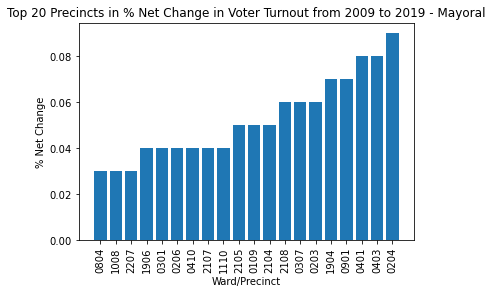

In [391]:
temp3 = df.sort_values(by=['M % Net Change']).tail(20).reset_index(drop=False)
plt.bar(temp3['Ward/Precinct'],temp3['M % Net Change'])
plt.xticks(rotation=90)
plt.title('Top 20 Precincts in % Net Change in Voter Turnout from 2009 to 2019 - Mayoral')
plt.xlabel('Ward/Precinct')
plt.ylabel('% Net Change')

In [396]:
close_look.to_csv('Top20_Precincts_%_Change_Voter_Turnout_2009-17_Mayoral.csv')

In [392]:
prec = temp3['Ward/Precinct'].tolist()
close_look = pd.DataFrame(columns=['Ward/Precint', '% Of Total Ballots Cast 2009', 'Avg. Ballots Cast Per Precinct 2009', 
                             'Precinct Ballots Cast 2009', '% Of Total Ballots Cast 2019', 'Avg. Ballots Cast Per Precinct 2019', 
                             'Precinct Ballots Cast 2019', '% Change in Income'])
for i in range(len(prec)):
    filt = df['Ward/Precinct'] == prec[i]
    temp_df = df[filt].reset_index(drop=False)
    close_look.loc[i] = [prec[i], round(temp_df.loc[0, 'CC Ballots 2009']/total09_cc,3), round(total09_cc/254, 3), 
                   temp_df.loc[0, 'CC Ballots 2009'], round(temp_df.loc[0, 'CC Ballots 2019']/total19_cc,3),
                   round(total19_cc/254,3),temp_df.loc[0, 'CC Ballots 2019'],temp_df.loc[0, '% Change in Median Income']]
close_look

,Ward/Precint,% Of Total Ballots Cast 2009,Avg. Ballots Cast Per Precinct 2009,Precinct Ballots Cast 2009,% Of Total Ballots Cast 2019,Avg. Ballots Cast Per Precinct 2019,Precinct Ballots Cast 2019,% Change in Income
0,0804,0.001,437.756,150,0.001,263.713,89,0.35
1,1008,0.004,437.756,398,0.005,263.713,358,0.28
2,2207,0.003,437.756,355,0.005,263.713,364,0.39
3,1906,0.006,437.756,661,0.007,263.713,483,0.20
4,0301,0.010,437.756,1113,0.006,263.713,378,0.28
5,0206,0.007,437.756,747,0.006,263.713,370,0.32
6,0410,0.000,437.756,42,0.001,263.713,38,0.42
7,2107,0.002,437.756,185,0.003,263.713,174,0.40
8,1110,0.004,437.756,416,0.005,263.713,311,0.36
9,2105,0.001,437.756,148,0.002,263.713,164,0.50


In [340]:
filt = neighbs['WARD_PRECI'] == '0308'
neighbs[filt]
#Downtown/Chinatown/South End

,WARD_PRECI,NEIGHBORHOOD,%
118,0308,Leather District,0.0670
119,0308,Chinatown,0.3041
120,0308,South End,0.1570
121,0308,Beacon Hill,0.0001
122,0308,Downtown,0.4703


In [341]:
filt = neighbs['WARD_PRECI'] == '0109'
neighbs[filt]

,WARD_PRECI,NEIGHBORHOOD,%
227,0109,East Boston,0.9941


In [349]:
filt = neighbs['WARD_PRECI'] == '0410'
neighbs[filt]

,WARD_PRECI,NEIGHBORHOOD,%
105,0410,Mission Hill,0.0173
106,0410,Longwood,0.8948
107,0410,Fenway,0.0825


In [343]:
overlap = []
for i in range(len(temp)):
    if temp.loc[i, 'Ward/Precinct'] in temp1['Ward/Precinct'].tolist():
        overlap.append(temp.loc[i, 'Ward/Precinct'])
overlap

['2016',
 '2017',
 '0609',
 '0608',
 '0703',
 '2019',
 '2018',
 '2015',
 '0702',
 '1609',
 '2012',
 '2013',
 '0606',
 '2014',
 '0603',
 '1820',
 '0605']

In [344]:
overlap2 = []
for i in range(len(temp2)):
    if temp2.loc[i, 'Ward/Precinct'] in temp3['Ward/Precinct'].tolist():
        overlap2.append(temp2.loc[i, 'Ward/Precinct'])
overlap2

['2107', '2207', '2105', '2108', '2104', '0410']

In [345]:
check = pd.DataFrame(columns=['Ward/Precinct', 'Neighborhood', 'White / POC 2009', 'White / POC 2017', 'White / POC 2019'])

for p in overlap:
    filt = neighbs['WARD_PRECI'] == p
    display(neighbs[filt])

,WARD_PRECI,NEIGHBORHOOD,%
292,2016,West Roxbury,0.9737


,WARD_PRECI,NEIGHBORHOOD,%
298,2017,West Roxbury,0.9932


,WARD_PRECI,NEIGHBORHOOD,%
395,0609,South Boston,0.9869


,WARD_PRECI,NEIGHBORHOOD,%
394,0608,South Boston,1.0


,WARD_PRECI,NEIGHBORHOOD,%
390,0703,South Boston,0.9769


,WARD_PRECI,NEIGHBORHOOD,%
299,2019,West Roxbury,0.9849


,WARD_PRECI,NEIGHBORHOOD,%
297,2018,West Roxbury,1.0


,WARD_PRECI,NEIGHBORHOOD,%
289,2015,West Roxbury,0.9897


,WARD_PRECI,NEIGHBORHOOD,%
391,0702,South Boston,1.0


,WARD_PRECI,NEIGHBORHOOD,%
338,1609,Dorchester,1.0


,WARD_PRECI,NEIGHBORHOOD,%
296,2012,West Roxbury,1.0


,WARD_PRECI,NEIGHBORHOOD,%
295,2013,West Roxbury,1.0


,WARD_PRECI,NEIGHBORHOOD,%
393,0606,South Boston,1.0


,WARD_PRECI,NEIGHBORHOOD,%
294,2014,West Roxbury,1.0


,WARD_PRECI,NEIGHBORHOOD,%
397,0603,South Boston,1.0


,WARD_PRECI,NEIGHBORHOOD,%
301,1820,Hyde Park,0.9645


,WARD_PRECI,NEIGHBORHOOD,%
399,0605,South Boston,0.9521


In [346]:
check1 = pd.DataFrame(columns=['Ward/Precinct', 'Neighborhood', 'White / POC 2009', 'White / POC 2017', 'White / POC 2019'])

for p in overlap2:
    filt = neighbs['WARD_PRECI'] == p
    display(neighbs[filt])

,WARD_PRECI,NEIGHBORHOOD,%
266,2107,Brighton,0.0004
267,2107,Allston,0.9996


,WARD_PRECI,NEIGHBORHOOD,%
269,2207,Brighton,1.0


,WARD_PRECI,NEIGHBORHOOD,%
400,2105,Allston,0.9968


,WARD_PRECI,NEIGHBORHOOD,%
259,2108,Brighton,0.5448
260,2108,Allston,0.4338


,WARD_PRECI,NEIGHBORHOOD,%
402,2104,Allston,1.0


,WARD_PRECI,NEIGHBORHOOD,%
105,0410,Mission Hill,0.0173
106,0410,Longwood,0.8948
107,0410,Fenway,0.0825


In [348]:
check['Ward/Precinct'] = overlap
for i in range(len(overlap)):
    filt = neighbs['WARD_PRECI'] == str(overlap[i])
    if len(str(overlap[i])) == 3:
        filt = neighbs['WARD_PRECI'] == '0' + str(overlap[i])
    temp = neighbs[filt].sort_values(by='%').reset_index(drop=False)
    check.loc[i, 'Neighborhood'] = temp.loc[0, 'NEIGHBORHOOD']

check = check.sort_values(by='Neighborhood').reset_index(drop=False).drop('index',axis=1)

for i in range(len(check)):
    wp = check.loc[i, 'Ward/Precinct']
    filt = cc09['Ward/Precinct'] == int(wp)
    check.loc[i, 'White / POC 2009'] = str(cc09[filt].reset_index(drop=False).loc[0, 'WHITE']) + ' / ' + str(round(1 - cc09[filt].reset_index(drop=False).loc[0, 'WHITE'], 3))
    filt = cc19['Ward/Precinct'] == int(wp)
    check.loc[i, 'White / POC 2019'] = str(cc19[filt].reset_index(drop=False).loc[0, 'WHITE']) + ' / ' + str(round(1 - cc19[filt].reset_index(drop=False).loc[0, 'WHITE'], 3))
    filt = m17['Ward_Precinct'] == int(wp)
    check.loc[i, 'White / POC 2017'] = str(m17[filt].reset_index(drop=False).loc[0, 'WHITE']) + ' / ' + str(round(1 - m17[filt].reset_index(drop=False).loc[0, 'WHITE'],3))

        
#check.loc[3, 'Neighborhood'] = 'Mostly Hyde Park, Partly Roslindale'
check

,Ward/Precinct,Neighborhood,White / POC 2009,White / POC 2017,White / POC 2019
0,1609,Dorchester,0.954 / 0.046,0.904 / 0.096,0.904 / 0.096
1,1820,Hyde Park,0.542 / 0.458,0.435 / 0.565,0.435 / 0.565
2,0702,South Boston,0.978 / 0.022,0.939 / 0.061,0.939 / 0.061
3,0603,South Boston,0.925 / 0.075,0.844 / 0.156,0.844 / 0.156
4,0606,South Boston,0.971 / 0.029,0.943 / 0.057,0.943 / 0.057
5,0605,South Boston,0.924 / 0.076,0.913 / 0.087,0.913 / 0.087
6,0703,South Boston,0.981 / 0.019,0.937 / 0.063,0.937 / 0.063
7,0608,South Boston,0.984 / 0.016,0.982 / 0.018,0.982 / 0.018
8,0609,South Boston,0.995 / 0.005,0.974 / 0.026,0.974 / 0.026
9,2018,West Roxbury,0.842 / 0.158,0.876 / 0.124,0.876 / 0.124


In [328]:
check1['Ward/Precinct'] = overlap2
for i in range(len(overlap2)):
    filt = neighbs['WARD_PRECI'] == str(overlap2[i])
    if len(str(overlap2[i])) == 3:
        filt = neighbs['WARD_PRECI'] == '0' + str(overlap2[i])
    temp = neighbs[filt].sort_values(by='%').reset_index(drop=False)
    check1.loc[i, 'Neighborhood'] = temp.loc[0, 'NEIGHBORHOOD']

check1 = check1.sort_values(by='Neighborhood').reset_index(drop=False).drop('index',axis=1)

for i in range(len(check1)):
    wp = check1.loc[i, 'Ward/Precinct']
    filt = cc09['Ward/Precinct'] == int(wp)
    check1.loc[i, 'White / POC 2009'] = str(cc09[filt].reset_index(drop=False).loc[0, 'WHITE']) + ' / ' + str(round(1 - cc09[filt].reset_index(drop=False).loc[0, 'WHITE'], 3))
    filt = cc19['Ward/Precinct'] == int(wp)
    check1.loc[i, 'White / POC 2019'] = str(cc19[filt].reset_index(drop=False).loc[0, 'WHITE']) + ' / ' + str(round(1 - cc19[filt].reset_index(drop=False).loc[0, 'WHITE'], 3))
    filt = m17['Ward_Precinct'] == int(wp)
    check1.loc[i, 'White / POC 2017'] = str(m17[filt].reset_index(drop=False).loc[0, 'WHITE']) + ' / ' + str(round(1 - m17[filt].reset_index(drop=False).loc[0, 'WHITE'], 3))

check1

,Ward/Precinct,Neighborhood,White / POC 2009,White / POC 2017,White / POC 2019
0,2108,Allston,0.748 / 0.252,0.654 / 0.346,0.654 / 0.346
1,2202,Brighton,0.661 / 0.339,0.588 / 0.412,0.588 / 0.412


In [329]:
check1.loc[0,'Neighborhood'] = 'Brighton/Allston'
check1.loc[1, 'Neighborhood'] = 'Mostly Allston, Partly Brighton'
check1

,Ward/Precinct,Neighborhood,White / POC 2009,White / POC 2017,White / POC 2019
0,2108,Brighton/Allston,0.748 / 0.252,0.654 / 0.346,0.654 / 0.346
1,2202,"Mostly Allston, Partly Brighton",0.661 / 0.339,0.588 / 0.412,0.588 / 0.412
